Task2-Color Identification in Images

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

Loading the Image

In [5]:
image = cv2.imread('C:\\Users\\harsh\\OneDrive\\Pictures\\avengers.jpg')
cv2.imshow('i',image)
cv2.waitKey(0)

-1

The type of this input is <class 'numpy.ndarray'>
Shape: (2160, 3840, 3)


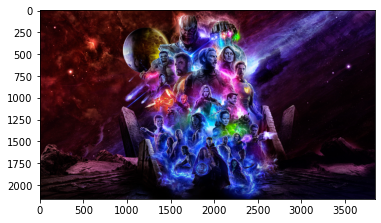

In [6]:
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

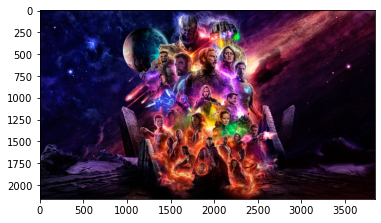

In [7]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

BGR to GRAY

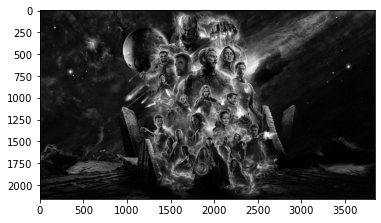

In [8]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

Resizing the image

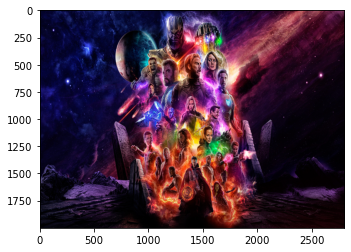

In [13]:
resized_image = cv2.resize(image, (2800, 2000))
plt.imshow(resized_image)

Color Identification

In [14]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [15]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [16]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

no of clusters=no of colors=10

In [21]:
clf = KMeans(n_clusters = 10)
labels = clf.fit_predict(modified_image)

([<matplotlib.patches.Wedge at 0x1b2efef33a0>,
 [Text(0.5792107151826925, 0.9351550392408492, '#0a030d'),
  Text(-0.9782505368307335, 0.503016786191457, '#72232d'),
  Text(-1.026525051264695, -0.39528005151539747, '#cc5530'),
  Text(-0.5731514492243496, -0.9388809382728078, '#7558ae'),
  Text(0.1471899128837767, -1.0901078522537422, '#3f3062'),
  Text(0.5906976932606764, -0.9279419352397626, '#330d24'),
  Text(0.8545433886072904, -0.6926439178882392, '#e3b9cc'),
  Text(0.988026678850483, -0.4835320898137833, '#ce827e'),
  Text(1.0654271823861692, -0.2736145446292443, '#0b0939'),
  Text(1.096988714421288, -0.0813373249641896, '#94495b')])

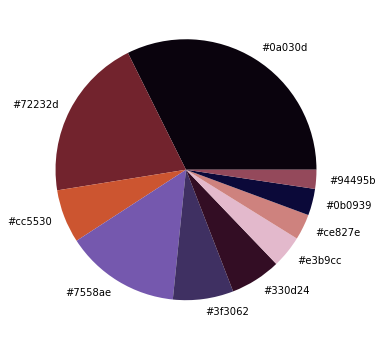

In [23]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

#if (show_chart):
plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

#return rgb_colors